<a href="https://colab.research.google.com/github/Premjit1/EEMAIL-CAMPAIGN-EFFECTIVENESS/blob/main/EMAIL_CAMPAIGN_CAPSTONE_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing data files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ='/content/drive/MyDrive/data_email_campaign.csv'

In [ ]:
df=pd.read_csv(path)

In [ ]:
#exploratory data analysis
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
df.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


In [ ]:
df.describe

<bound method NDFrame.describe of                 Email_ID  Email_Type  Subject_Hotness_Score  \
0      EMA00081000034500           1                    2.2   
1      EMA00081000045360           2                    2.1   
2      EMA00081000066290           2                    0.1   
3      EMA00081000076560           1                    3.0   
4      EMA00081000109720           1                    0.0   
...                  ...         ...                    ...   
68348  EMA00089995974500           2                    0.4   
68349  EMA00089998225300           1                    1.3   
68350  EMA00089998436500           1                    2.2   
68351  EMA00089999168800           1                    0.4   
68352  EMA00089999316900           1                    1.5   

       Email_Source_Type Customer_Location  Email_Campaign_Type  \
0                      2                 E                    2   
1                      1               NaN                    2   
2       

In [ ]:
df.shape

(68353, 12)

In [ ]:
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
#checking for duplicate value
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [ ]:
#checking for null values
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [ ]:
#categorical data analysis
df1 = df.select_dtypes(include =['object','int']).copy()
#dropping Word_Count because it's numeric data
df1.drop('Word_Count',axis=1,inplace=True)
df1.head()

,Email_ID,Email_Type,Email_Source_Type,Customer_Location,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,EMA00081000034500,1,2,E,2,1,0
1,EMA00081000045360,2,1,NaN,2,2,0
2,EMA00081000066290,2,1,B,3,2,1
3,EMA00081000076560,1,2,E,2,2,0
4,EMA00081000109720,1,2,C,3,2,0


In [ ]:
df2 = pd.DataFrame(columns = ['Column', 'Values', 'Total Count', 'Total_COunt_Excluding_Null', 
                                       'Missing Value', 'Missing %'])
tmp = pd.DataFrame()

for c in df1.columns:
    tmp['Column'] = [c]
    tmp['Values'] = [df1[c].unique()]
    tmp['Total Count'] = len(list(df1[c].unique()))
    tmp['Total_COunt_Excluding_Null'] = int(df1[c].nunique())
    tmp['Missing Value'] = df1.isnull().sum()
    tmp['Missing %'] = (df1.isnull().sum()/ len(df1)).round(3)*100
    df2 = df2.append(tmp)
    
df2

,Column,Values,Total Count,Total_COunt_Excluding_Null,Missing Value,Missing %
0,Email_ID,"[EMA00081000034500, EMA00081000045360, EMA0008...",68353,68353,NaN,NaN
0,Email_Type,"[1, 2]",2,2,NaN,NaN
0,Email_Source_Type,"[2, 1]",2,2,NaN,NaN
0,Customer_Location,"[E, nan, B, C, G, D, F, A]",8,7,NaN,NaN
0,Email_Campaign_Type,"[2, 3, 1]",3,3,NaN,NaN
0,Time_Email_sent_Category,"[1, 2, 3]",3,3,NaN,NaN
0,Email_Status,"[0, 1, 2]",3,3,NaN,NaN


we observed
customer location has 17 percent missing values
categorical variables have no missing values
Email_Type and Email_Source_Type have 2 categories.

Email_Campaign_Type,Time_Email_sent_Category and Email_Status have 3 Categories

In [ ]:
#relationship between dependent and independent variable
df1.drop('Email_ID',axis=1,inplace=True)

In [ ]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 7 X categories, 3 hues =>
        ##    [0, 8, 16] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")


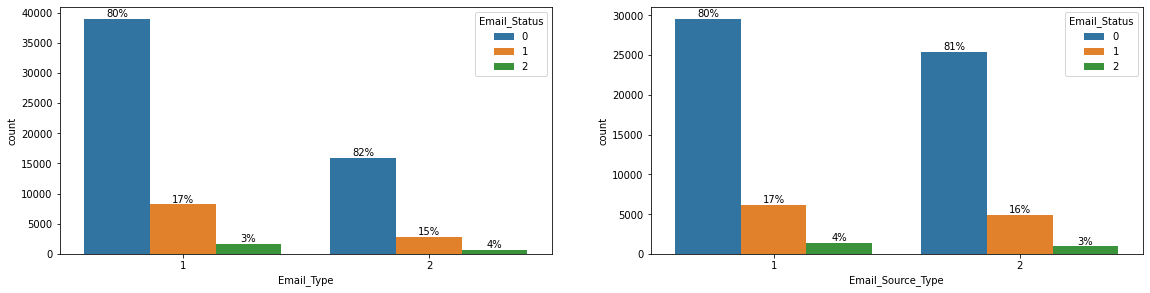

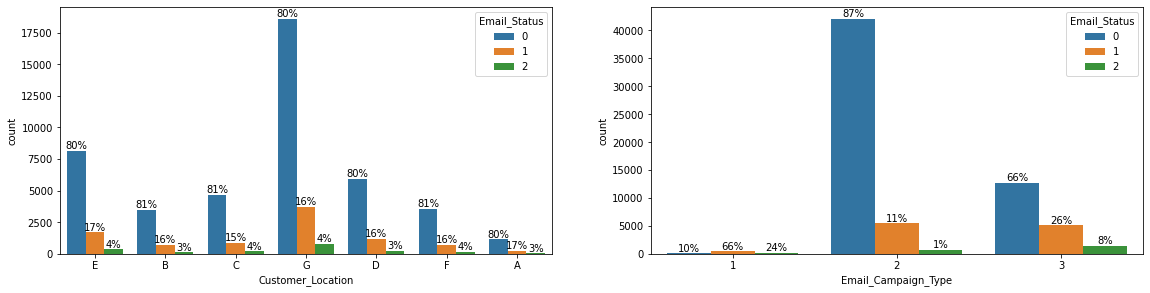

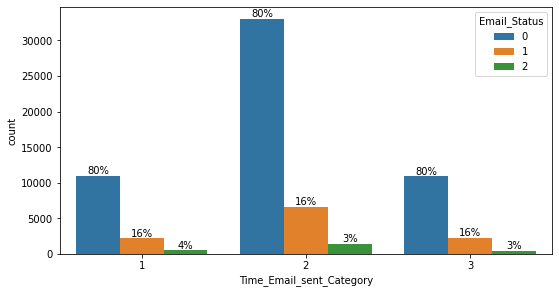

<Figure size 2160x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (30,10))
for c in list(df1.columns):
    if ix < 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = df1, x=c,hue='Email_Status' ,ax = ax1)
            barPerc(df1,c,ax1)            
    ix = ix +1
    if ix == 3: 
        fig = plt.figure(figsize = (30,10))
        ix =1

we observed from the graph that the distribution of Email_Status is almost similar in all the categories except in Email_Campaign_Type we can see that it shows a totally different trend . For Email_Campaign_Type=1 we see that only 10% of customers are ignoring the email and for 2 around 87% customer ignore the emails.

In [ ]:
#analysis of non categorical data
df3 = df.select_dtypes(include =['float']).copy()
df3['Word_Count'] = df.loc[df3.index, 'Word_Count'].copy()
df3.head()

,Subject_Hotness_Score,Total_Past_Communications,Total_Links,Total_Images,Word_Count
0,2.2,33.0,8.0,0.0,440
1,2.1,15.0,5.0,0.0,504
2,0.1,36.0,5.0,0.0,962
3,3.0,25.0,16.0,0.0,610
4,0.0,18.0,4.0,0.0,947


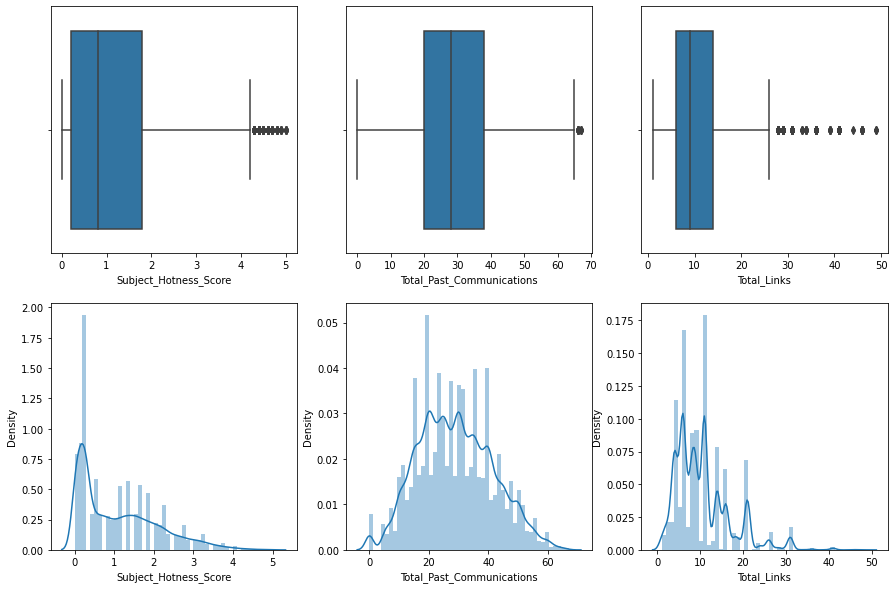

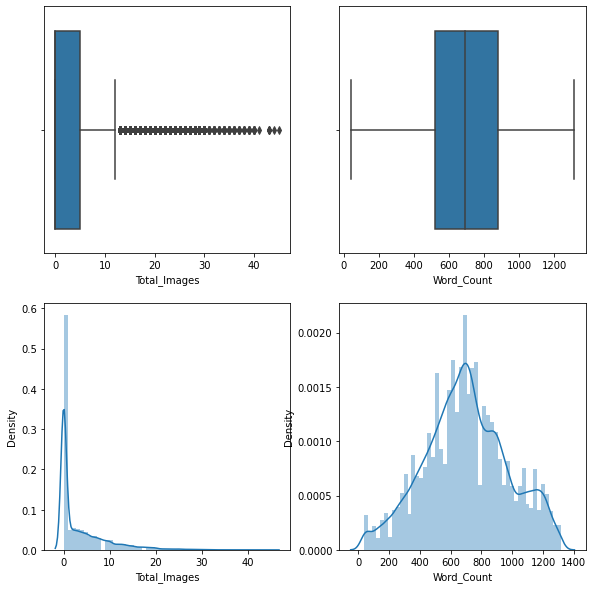

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df3.columns):
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data = df3, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(df3[c], ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [ ]:
df3['Email_Status'] = df.loc[df3.index, 'Email_Status'].copy()

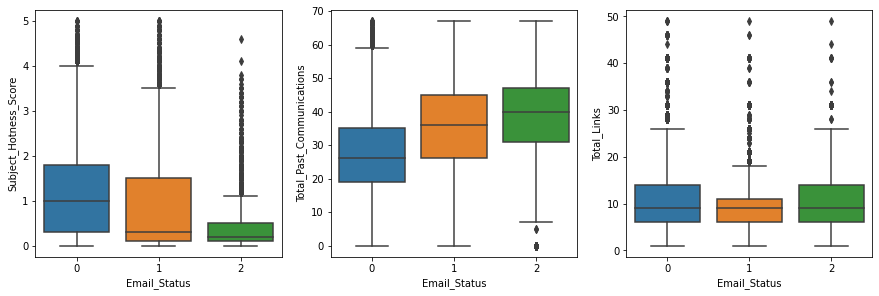

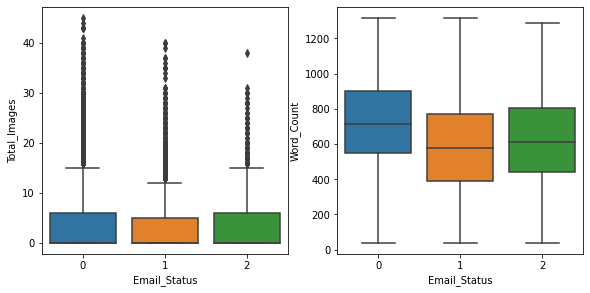

<Figure size 1080x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df3.columns):
    if ix <= 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data=df3, x='Email_Status', y=c, ax=ax1)        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

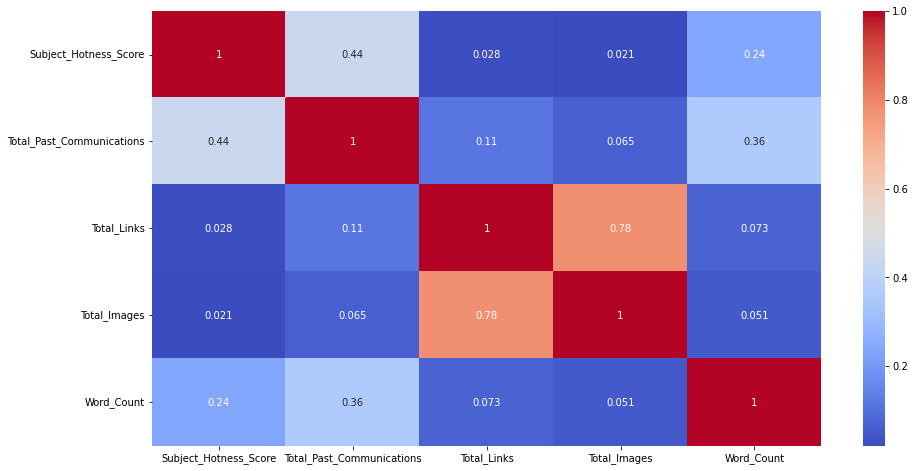

In [ ]:
#correlation analysis
plt.figure(figsize=(15,8))
correlation = df3.drop('Email_Status',axis=1).corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
df3.corr

<bound method DataFrame.corr of        Subject_Hotness_Score  Total_Past_Communications  Total_Links  \
0                        2.2                       33.0          8.0   
1                        2.1                       15.0          5.0   
2                        0.1                       36.0          5.0   
3                        3.0                       25.0         16.0   
4                        0.0                       18.0          4.0   
...                      ...                        ...          ...   
68348                    0.4                       22.0         16.0   
68349                    1.3                       40.0         31.0   
68350                    2.2                       33.0          9.0   
68351                    0.4                       50.0         14.0   
68352                    1.5                       20.0          6.0   

       Total_Images  Word_Count  Email_Status  
0               0.0         440             0  
1      

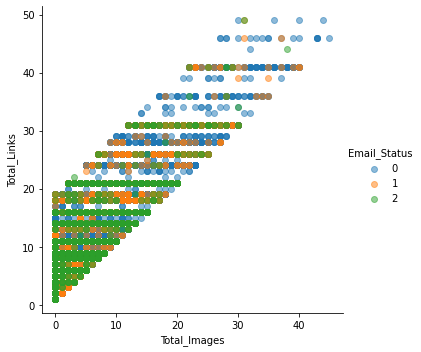

In [ ]:
sns.lmplot(x='Total_Images', y='Total_Links', hue='Email_Status', data=df, fit_reg=False, scatter_kws={'alpha':0.5})

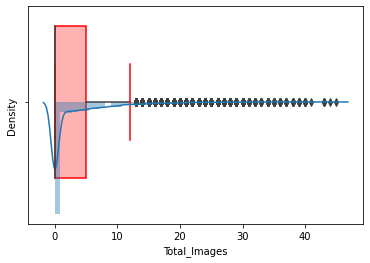

In [ ]:
ax=sns.boxplot(df3['Total_Images'],capprops=dict(color="red"),boxprops=dict(facecolor="red", color="red"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(df3['Total_Images'])

In [ ]:
#Finding number of data having 0 images
img_cnt_0=df3[df3['Total_Images']==0].count()['Total_Images']
#Total number of non nan data
total=df3['Total_Images'].count()
#finding percentage
pcnt_img_0=(img_cnt_0/total)*100
print("Percentage of data having Total_Images Zero is = ",pcnt_img_0)

Percentage of data having Total_Images Zero is =  52.58263843061971


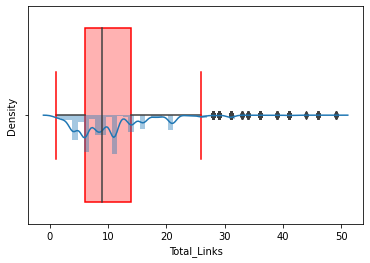

In [ ]:
ax=sns.boxplot(df3['Total_Links'],capprops=dict(color="red"),boxprops=dict(facecolor="red", color="red"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(df3['Total_Links'])

In [ ]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

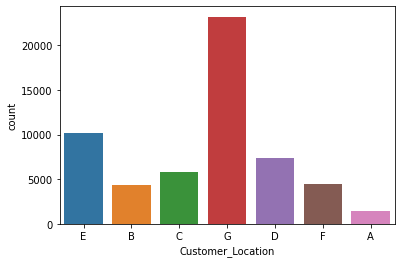

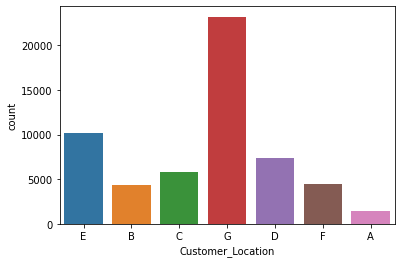

In [ ]:
#Visualizing Customer_Location
sns.countplot(df['Customer_Location'])

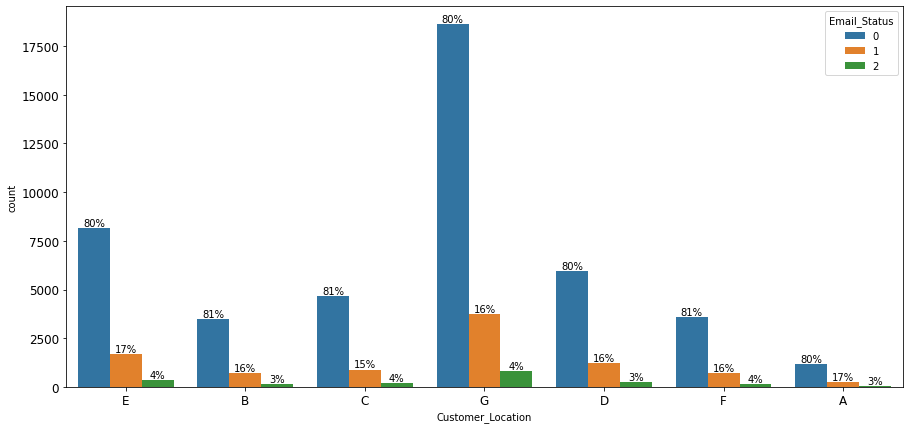

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(df['Customer_Location'],hue=df['Email_Status'])
plt.xticks(size=12)
plt.yticks(size=12)
barPerc(df,'Customer_Location',ax)

In [ ]:
df.drop('Customer_Location',inplace=True,axis=1)
print('Shape of data after dropping ',df.shape)

Shape of data after dropping  (68353, 11)


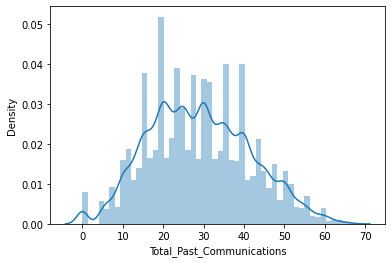

In [ ]:
#total pst communications
sns.distplot(df.Total_Past_Communications)

In [ ]:
print('Number of missing values before imputing is = ',df['Total_Past_Communications'].isnull().sum())
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean(),inplace=True)
print('Number of missing values after imputing is = ',df['Total_Past_Communications'].isnull().sum())

Number of missing values before imputing is =  6825
Number of missing values after imputing is =  0


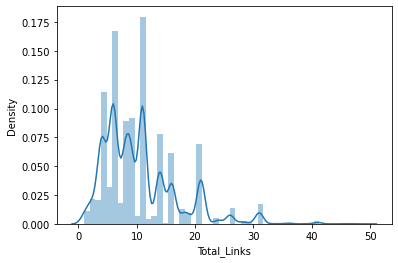

In [ ]:
sns.distplot(df.Total_Links)

In [ ]:

print('Number of missing values before imputing is = ',df['Total_Links'].isnull().sum())
df['Total_Links'].fillna(df['Total_Links'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',df['Total_Links'].isnull().sum())

Number of missing values before imputing is =  2201
Number of missing values after imputing is =  0


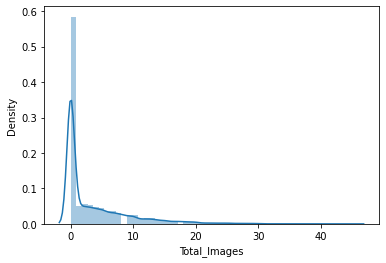

In [ ]:
sns.distplot(df.Total_Images)

In [ ]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',df['Total_Images'].isnull().sum())
df['Total_Images'].fillna(df['Total_Images'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',df['Total_Images'].isnull().sum())

Number of missing values before imputing is =  1677
Number of missing values after imputing is =  0


In [ ]:
df.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

In [ ]:
df['Links_Images']=df['Total_Links']+df['Total_Images']

In [ ]:
print('Shape of data before dropping ',df.shape)
df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)
print('Shape of data after dropping ',df.shape)

Shape of data before dropping  (68353, 12)
Shape of data after dropping  (68353, 10)


In [ ]:
# feature engineering
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Email_ID','Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Total_Links','Total_Images','Email_Status']]])


,variables,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Links_Images,2.629047


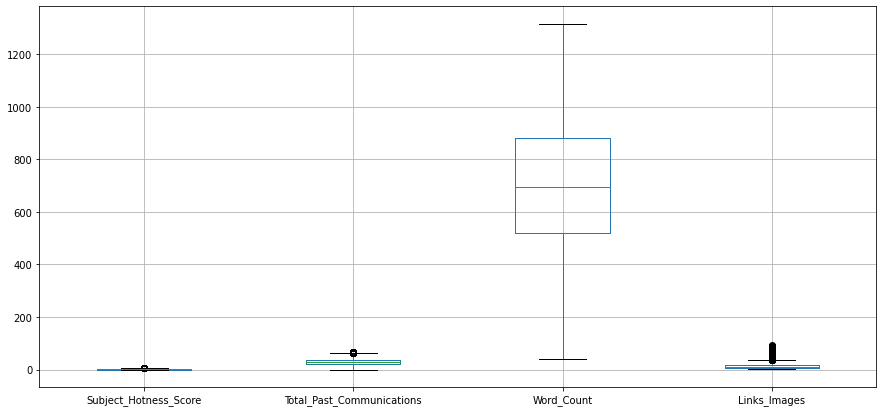

In [ ]:
#outlier treatment

plt.figure(figsize=(15,7))
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Links_Images']
df.boxplot(numerical_col)

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Links_Images': {0: 3061, 1: 437, 2: 122}}


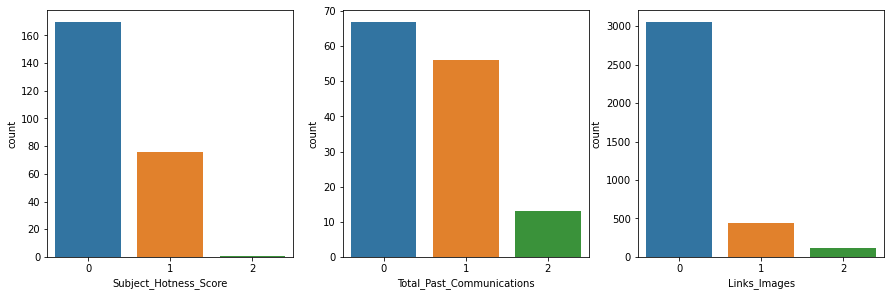

In [ ]:
numerical_col.remove('Word_Count')

fig = plt.figure(figsize = (15,10))
ix = 1
#dictionary d to store the count of each email_status 
d={}
#iterating through each column which have outlier
for x in [y for y in numerical_col]:
    #Finding Quartile
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    #Calculating Inter Quartile Range
    intr_qr = q75-q25
    #Fixing Boundaries for outliers
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    
    #list y to store email_status of only outliers
    y=[]
    y=df.loc[df[x] < min]['Email_Status'].tolist()
    y.append(df.loc[df[x] > max]['Email_Status'].tolist()) 
    d[x]={}
    for i in y[0]:
      d[x][i] = d[x].get(i,0) + 1
    ax1 = fig.add_subplot(2,3,ix)
    sns.countplot(y[0],ax=ax1)
    plt.xlabel(x)      
    ix = ix +1
print(d)

In [ ]:
sum_min=0
sum_maj=0
for x in [y for y in numerical_col]:
  sum_min+=d[x][1]
  sum_min+=d[x][2]
  sum_maj+=d[x][0]
total=df.groupby('Email_Status').count()['Email_Type'][1]+df.groupby('Email_Status').count()['Email_Type'][2]
total_0=df.groupby('Email_Status').count()['Email_Type'][0]
print("Percentage of majority class having outliers = ",100*sum_maj/total_0)
print("Percentage of minority class having outliers = ",100*sum_min/total)

Percentage of majority class having outliers =  6.002803006861907
Percentage of minority class having outliers =  5.256486728303012


In [ ]:
print('Shape of data before dropping ',df.shape)
df.drop('Email_ID',inplace=True,axis=1)
print('Shape of data after dropping ',df.shape)

Shape of data before dropping  (68353, 10)
Shape of data after dropping  (68353, 9)


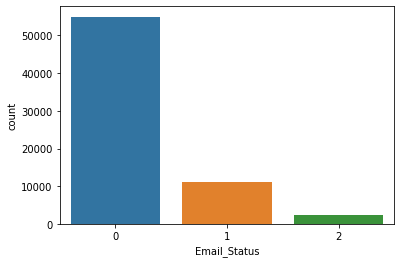

In [ ]:
sns.countplot(df['Email_Status'])

In [ ]:
df.groupby('Email_Status').count()['Email_Type']

Email_Status
0    54941
1    11039
2     2373
Name: Email_Type, dtype: int64

In [ ]:
#apply normalization changes
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Links_Images']
for column in numerical_col:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

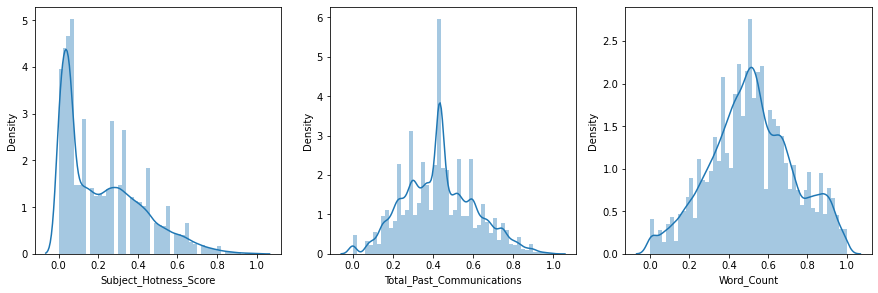

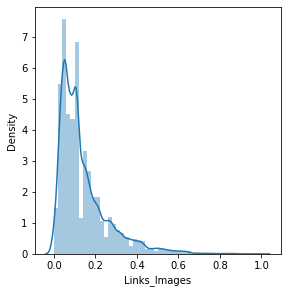

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in numerical_col:
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.distplot(df[c], ax=ax1)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [ ]:
#one hot encoding is required
cat_col=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category']
df=pd.get_dummies(df, columns=cat_col)
df.drop('Email_Type_2',axis=1,inplace=True) #Since they have binary category
df.drop('Email_Source_Type_2',axis=1,inplace=True)

In [ ]:
list_of_col=list(df.columns)
list_of_col.remove('Email_Status')
list_of_col.append('Email_Status')
list_of_col
df=df[list_of_col]
df.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,0.44,0.492537,0.313480,0.076087,1,0,0,1,0,1,0,0,0
1,0.42,0.223881,0.363636,0.043478,0,1,0,1,0,0,1,0,0
2,0.02,0.537313,0.722571,0.043478,0,1,0,0,1,0,1,0,1
3,0.60,0.373134,0.446708,0.163043,1,0,0,1,0,0,1,0,0
4,0.00,0.268657,0.710815,0.032609,1,0,0,0,1,0,1,0,0


In [ ]:
def comp_feature_information_gain(df, target, descriptive_feature):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy'
    """
    target_entropy = compute_impurity(df[target])

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    
    
    information_gain = target_entropy - feature_remaining_impurity
    

    return(information_gain)
    
  

Subject_Hotness_Score : 0.03815999999999997
Total_Past_Communications : 0.08543499999999993
Word_Count : 0.04493199999999986
Links_Images : 0.023570999999999898
Email_Type_1 : 0.00040000000000006697
Email_Source_Type_1 : 4.899999999996574e-05
Email_Campaign_Type_1 : 0.017567
Email_Campaign_Type_2 : 0.050541999999999976
Email_Campaign_Type_3 : 0.03729300000000002
Time_Email_sent_Category_1 : -0.0008010000000000517
Time_Email_sent_Category_2 : -0.0006019999999999914
Time_Email_sent_Category_3 : 0.0


Text(0.5, 1.0, 'Feature Importance')

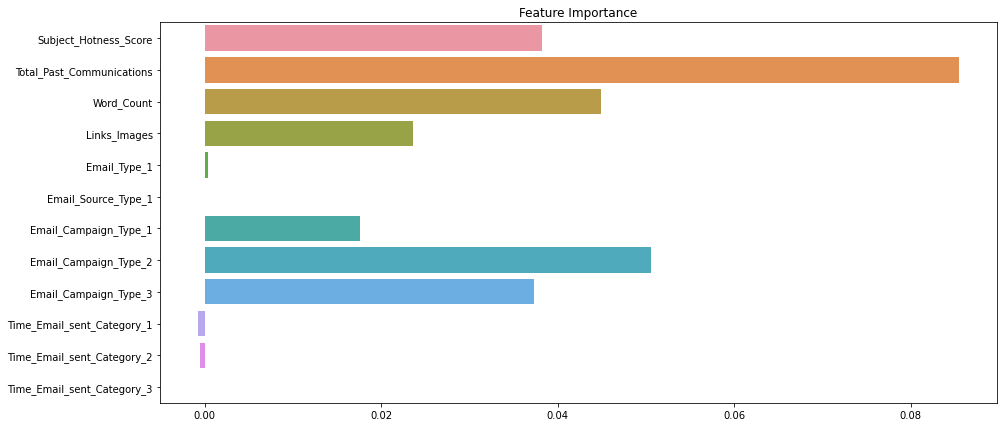

In [ ]:
info_gain={}
for feature in df.drop(columns='Email_Status').columns:
    feature_info_gain = comp_feature_information_gain(df, 'Email_Status', feature)
    info_gain[feature]=feature_info_gain
    print(feature, ':', feature_info_gain)
keys = list(info_gain.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(info_gain[k]) for k in info_gain]
plt.figure(figsize=(15,7))
sns.barplot(y=keys, x=vals)
plt.title('Feature Importance')

In [ ]:
# We can observe that Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3 have very less importance we can drop this feature.
drop=['Time_Email_sent_Category_1','Time_Email_sent_Category_2','Time_Email_sent_Category_3']
df.drop(drop,inplace=True,axis=1)
df.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Email_Status
0,0.44,0.492537,0.313480,0.076087,1,0,0,1,0,0
1,0.42,0.223881,0.363636,0.043478,0,1,0,1,0,0
2,0.02,0.537313,0.722571,0.043478,0,1,0,0,1,1
3,0.60,0.373134,0.446708,0.163043,1,0,0,1,0,0
4,0.00,0.268657,0.710815,0.032609,1,0,0,0,1,0


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(df.iloc[:,0:-1], df['Email_Status'])

print('Original dataset shape:', len(df))
print('Resampled dataset shape', len(y_rus))

Original dataset shape: 68353
Resampled dataset shape 7119


Text(0.5, 1.0, 'Before Undersampling')

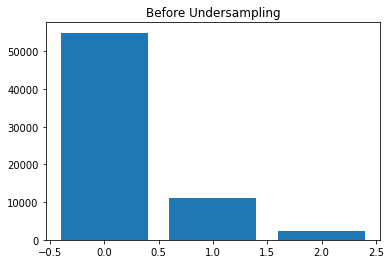

In [ ]:
plt.bar(Counter(df['Email_Status']).keys(), Counter(df['Email_Status']).values())
plt.title("Before Undersampling")

Text(0.5, 1.0, 'After Undersampling')

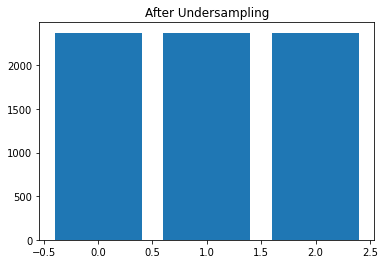

In [ ]:
plt.bar(Counter(y_rus).keys(), Counter(y_rus).values())
plt.title("After Undersampling")

In [ ]:
unique_elements, counts_elements = np.unique(y_rus, return_counts=True)
print("Frequency of unique values of the Email_Status:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the Email_Status:
[[   0    1    2]
 [2373 2373 2373]]


In [ ]:
#splitting data set

X_train_fs, X_test_fs, y_train, y_test = train_test_split(x_rus, y_rus, test_size = 0.2, random_state = 3,stratify=y_rus)

DECISION TREE MODELLING

In [ ]:
#decision tree
dt_classifier = DecisionTreeClassifier()

In [ ]:
dt_classifier.fit(X_train_fs,y_train)

DecisionTreeClassifier()

In [ ]:
column_name=['MODEL_NAME','F1_SCORE_Train','PRECISION_Train','RECALL__Train','ACCURACY_Train','ROC_AUC_Train','F1_SCORE_Test','PRECISION_Test','RECALL__Test','ACCURACY_Test','ROC_AUC_Test']
All_model=pd.DataFrame(columns=column_name)

In [ ]:
def evaluate(model,X_train,y_train,X_test,y_test,model_name):
  '''Function for evaluating all the models'''
  global column_name
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)

  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)
  test_preds = model.predict_proba(X_test)

  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds )


  # Get the Recall for train and test
  train_recall = recall_score(y_train, train_class_preds, average='weighted')
  test_recall = recall_score(y_test, test_class_preds, average='weighted')

  # Get the precision for train and test
  train_precision = precision_score(y_train, train_class_preds, average='weighted')
  test_precision = precision_score(y_test, test_class_preds, average='weighted')

  # Get the f1 Score for train and test
  train_f1score = f1_score(y_train, train_class_preds, average='weighted')
  test_f1score = f1_score(y_test, test_class_preds, average='weighted')

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(y_train,train_preds,multi_class = 'ovr')
  test_auc = roc_auc_score(y_test,test_preds,multi_class = 'ovr')

  list_score=[model_name,train_f1score,train_precision,train_recall,train_accuracy,train_auc,test_f1score,test_precision,test_recall,test_accuracy,test_auc]
  res = {column_name[i]: list_score[i] for i in range(len(column_name))}
  

  print("----- Evaluation on train data -----\n")
  print("Confusion matrix \n")
  print(train_cm)
  print("\n Accuracy = ",train_accuracy)
  print("\n Recall = ",train_recall)
  print("\n Precision = ",train_precision)
  print("\n F1 score = ",train_f1score)
  print("\n Roc_Auc score = ",train_auc)

  print("\n\n----- Evaluation on test data -----\n")
  print("Confusion matrix \n")
  print(test_cm)
  print("\n Accuracy = ",test_accuracy)
  print("\n Recall = ",test_recall)
  print("\n Precision = ",test_precision)
  print("\n F1 score = ",test_f1score)
  print("\n Roc_Auc score = ",test_auc)

  fpr = {}
  tpr = {}
  thresh ={}
  n_class=3
  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend()
  return res

In [ ]:
final_list=[]

----- Evaluation on train data -----

Confusion matrix 

[[1898    0    0]
 [   0 1898    1]
 [   0    4 1894]]

 Accuracy =  0.9991220368744512

 Recall =  0.9991220368744512

 Precision =  0.9991228667313098

 F1 score =  0.9991220361436879

 Roc_Auc score =  0.9999983813505406


----- Evaluation on test data -----

Confusion matrix 

[[262 133  80]
 [112 223 139]
 [109 144 222]]

 Accuracy =  0.4964887640449438

 Recall =  0.4964887640449438

 Precision =  0.4973174871805097

 F1 score =  0.49655864547617007

 Roc_Auc score =  0.6223240050480338


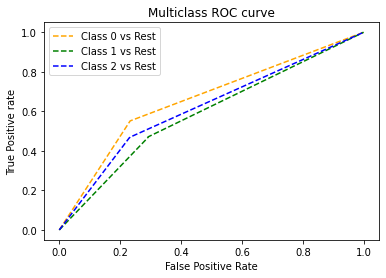

In [ ]:
res=evaluate(dt_classifier,X_train_fs,y_train,X_test_fs,y_test,'Decision_Tree_On_Under_Sampled_data')
final_list.append(res)

SUPPORT VECTOR MACHINE MODEL

In [ ]:
#SVM
from sklearn.svm import SVC
svc_model = SVC(probability=True)

# Fitting on the train set
svc_model.fit(X_train_fs,y_train)

SVC(probability=True)

----- Evaluation on train data -----

Confusion matrix 

[[1346  188  364]
 [ 636  390  873]
 [ 333  246 1319]]

 Accuracy =  0.5364354697102721

 Recall =  0.5364354697102721

 Precision =  0.5235802182547129

 F1 score =  0.5058614584700288

 Roc_Auc score =  0.7222344005492216


----- Evaluation on test data -----

Confusion matrix 

[[326  39 110]
 [156  94 224]
 [103  63 309]]

 Accuracy =  0.511938202247191

 Recall =  0.511938202247191

 Precision =  0.5058239650387089

 F1 score =  0.48296339920933534

 Roc_Auc score =  0.7023676507742839


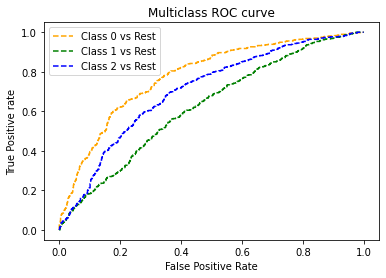

In [ ]:
# Evaluating the SVM Model
res=evaluate(svc_model,X_train_fs,y_train,X_test_fs,y_test,'SVM_On_Under_Sampled_Data')
final_list.append(res)

In [ ]:
#Hypertuning SVM Model
param_grid = {'C': [0.1, 100], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_fs, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   6.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.536 total time=   6.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   6.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   7.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   7.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.498 total time=   7.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   7.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.492 total time=   7.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.491 total time=   7.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   7.3s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.533 total time=  13.1s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;,

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 100], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1, probability=True)


----- Evaluation on train data -----

Confusion matrix 

[[1384  209  305]
 [ 619  525  755]
 [ 302  291 1305]]

 Accuracy =  0.5643546971027217

 Recall =  0.5643546971027217

 Precision =  0.5548011845756396

 F1 score =  0.5432740648547688

 Roc_Auc score =  0.7453341350427474


----- Evaluation on test data -----

Confusion matrix 

[[335  56  84]
 [147 126 201]
 [101  84 290]]

 Accuracy =  0.5273876404494382

 Recall =  0.5273876404494382

 Precision =  0.5175795043127296

 F1 score =  0.5088487157610052

 Roc_Auc score =  0.7066713062774136


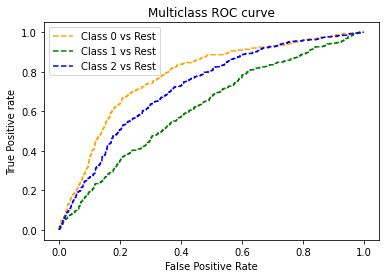

In [ ]:
res=evaluate(grid,X_train_fs,y_train,X_test_fs,y_test,'Hypertuned_SVM_On_Under_Sampled_data')
final_list.append(res)

XGBOOST

In [ ]:
xgb_model = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)

In [ ]:
xgb_model.fit(X_train_fs,y_train)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

----- Evaluation on train data -----

Confusion matrix 

[[1853   14   31]
 [  18 1830   51]
 [   9    8 1881]]

 Accuracy =  0.9769973661106234

 Recall =  0.9769973661106234

 Precision =  0.9773307121712044

 F1 score =  0.977013467844573

 Roc_Auc score =  0.9984930122416742


----- Evaluation on test data -----

Confusion matrix 

[[304 102  69]
 [116 185 173]
 [ 97 123 255]]

 Accuracy =  0.5224719101123596

 Recall =  0.5224719101123596

 Precision =  0.5174817397968362

 F1 score =  0.5187858795492726

 Roc_Auc score =  0.7077675547215488


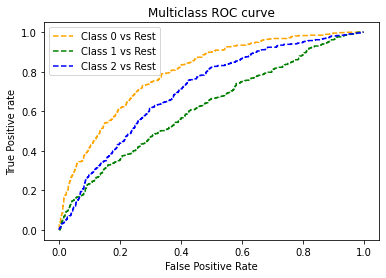

In [ ]:
# Evaluate the results
res=evaluate(xgb_model,X_train_fs,y_train,X_test_fs,y_test,'XGBoost')
final_list.append(res)

Naive Bayes Classifier

In [ ]:
# Importing the packages
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Instantiating all the models.
gausian = GaussianNB()
bernoulli = BernoulliNB()
multinomial = MultinomialNB()

In [ ]:
# Fit the model
gausian.fit(X_train_fs,y_train)

GaussianNB()

----- Evaluation on train data -----

Confusion matrix 

[[1535    1  362]
 [1000    2  897]
 [ 559    4 1335]]

 Accuracy =  0.5043020193151888

 Recall =  0.5043020193151888

 Precision =  0.43213595214885664

 F1 score =  0.40375367227139597

 Roc_Auc score =  0.6894920770288661


----- Evaluation on test data -----

Confusion matrix 

[[366   0 109]
 [243   0 231]
 [156   1 318]]

 Accuracy =  0.4803370786516854

 Recall =  0.4803370786516854

 Precision =  0.3207964694364478

 F1 score =  0.3841576348703289

 Roc_Auc score =  0.6738047834636411


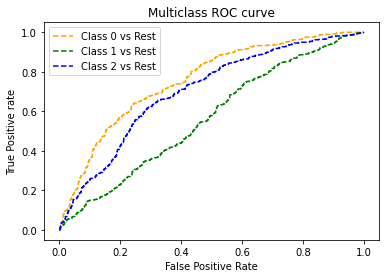

In [ ]:
res=evaluate(gausian,X_train_fs,y_train,X_test_fs,y_test,'Gaussian')
final_list.append(res)

Bernoulli

In [ ]:
# Fit model
bernoulli.fit(X_train_fs,y_train)

BernoulliNB()

----- Evaluation on train data -----

Confusion matrix 

[[1497    5  396]
 [ 964   25  910]
 [ 546   13 1339]]

 Accuracy =  0.5023705004389816

 Recall =  0.5023705004389816

 Precision =  0.52849992674804

 F1 score =  0.4084736257448107

 Roc_Auc score =  0.6475385599695932


----- Evaluation on test data -----

Confusion matrix 

[[355   0 120]
 [235   9 230]
 [156   0 319]]

 Accuracy =  0.47963483146067415

 Recall =  0.47963483146067415

 Precision =  0.6506556476864817

 F1 score =  0.3923992055022221

 Roc_Auc score =  0.6217489620353008


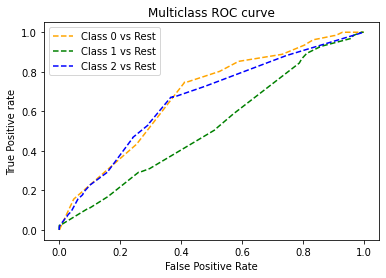

In [ ]:
res=evaluate(bernoulli,X_train_fs,y_train,X_test_fs,y_test,'Bernoulli')
final_list.append(res)

In [ ]:
multinomial.fit(X_train_fs,y_train)

MultinomialNB()

----- Evaluation on train data -----

Confusion matrix 

[[1501    0  397]
 [ 989    0  910]
 [ 556    0 1342]]

 Accuracy =  0.4992098331870061

 Recall =  0.4992098331870061

 Precision =  0.33306939837084826

 F1 score =  0.39908989454571353

 Roc_Auc score =  0.68837914232514


----- Evaluation on test data -----

Confusion matrix 

[[355   0 120]
 [241   0 233]
 [156   0 319]]

 Accuracy =  0.47331460674157305

 Recall =  0.47331460674157305

 Precision =  0.3158139068067461

 F1 score =  0.3785592421993318

 Roc_Auc score =  0.6661913709948354


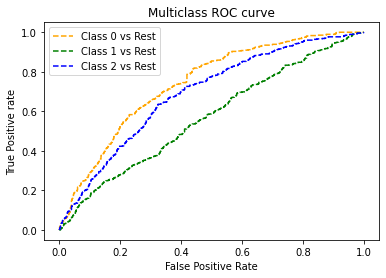

In [ ]:
res=evaluate(multinomial,X_train_fs,y_train,X_test_fs,y_test,'Multinomial')
final_list.append(res)

KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Fit the model on the train set
classifier_knn.fit(X_train_fs,y_train)

KNeighborsClassifier()

----- Evaluation on train data -----

Confusion matrix 

[[1452  309  137]
 [ 453 1088  358]
 [ 332  392 1174]]

 Accuracy =  0.6521510096575944

 Recall =  0.6521510096575944

 Precision =  0.6535452949777218

 F1 score =  0.6501812313767035

 Roc_Auc score =  0.8450862381044212


----- Evaluation on test data -----

Confusion matrix 

[[300 118  57]
 [146 176 152]
 [111 163 201]]

 Accuracy =  0.47542134831460675

 Recall =  0.47542134831460675

 Precision =  0.4713818322007329

 F1 score =  0.47130565394623514

 Roc_Auc score =  0.6538492162388561


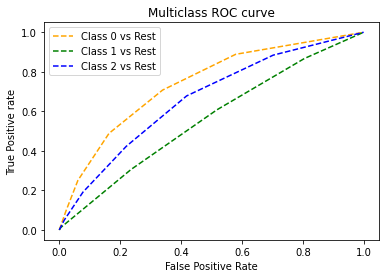

In [ ]:
res=evaluate(classifier_knn,X_train_fs,y_train,X_test_fs,y_test,'KNN')
final_list.append(res)

In [ ]:
param_grid = {'n_neighbors':np.arange(1,5)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= RandomizedSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_fs,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([1, 2, 3, 4])})

In [ ]:
print("Best score is: ",knn_cv.best_score_)

Best score is:  0.4899034240561896


In [ ]:
print("Best Parameters are: ",knn_cv.best_params_)

Best Parameters are:  {'n_neighbors': 4}


----- Evaluation on train data -----

Confusion matrix 

[[1515  207  176]
 [ 424 1225  250]
 [ 292  509 1097]]

 Accuracy =  0.6737489025460931

 Recall =  0.6737489025460931

 Precision =  0.6768168297284679

 F1 score =  0.6710567431171429

 Roc_Auc score =  0.8641260582619464


----- Evaluation on test data -----

Confusion matrix 

[[296 115  64]
 [144 203 127]
 [ 91 194 190]]

 Accuracy =  0.48384831460674155

 Recall =  0.48384831460674155

 Precision =  0.484265211843567

 F1 score =  0.48143526642739143

 Roc_Auc score =  0.6495322589061923


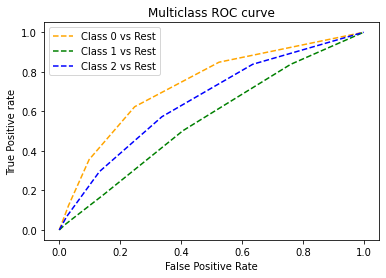

In [ ]:
res=evaluate(knn_cv,X_train_fs,y_train,X_test_fs,y_test,'Hyper_Tuned_KNN')
final_list.append(res)

random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train_fs,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

----- Evaluation on train data -----

Confusion matrix 

[[1873   11   14]
 [  27 1849   23]
 [  23   46 1829]]

 Accuracy =  0.9747146619841967

 Recall =  0.9747146619841967

 Precision =  0.9747541444433547

 F1 score =  0.9746959075087064

 Roc_Auc score =  0.9982751877905303


----- Evaluation on test data -----

Confusion matrix 

[[299 114  62]
 [133 206 135]
 [ 97 154 224]]

 Accuracy =  0.511938202247191

 Recall =  0.511938202247191

 Precision =  0.5106810760663598

 F1 score =  0.5101252294194011

 Roc_Auc score =  0.6982534548836467


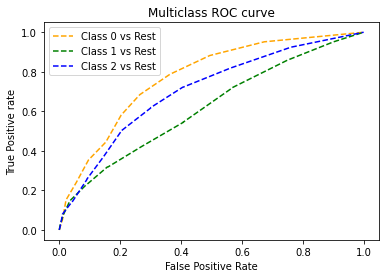

In [ ]:
res=evaluate(classifier_rf,X_train_fs,y_train,X_test_fs,y_test,'Random_Forest')
final_list.append(res)

In [ ]:
# Number of trees
n_estimators = [50,100]

# Maximum depth of trees
max_depth = [4,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

#Average parameters
#avg= [None,'micro','macro','samples','weighted']

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)

In [ ]:
rf_random.fit(X_train_fs,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.3s
[CV] END max_depth=8, min_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [4, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100],
                                        'n_estimators': [50, 100]},
                   verbose=2)

In [ ]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=50)

In [ ]:
rf_optimal_model = rf_random.best_estimator_

----- Evaluation on train data -----

Confusion matrix 

[[1375  256  267]
 [ 578  553  768]
 [ 301  286 1311]]

 Accuracy =  0.5687445127304653

 Recall =  0.5687445127304653

 Precision =  0.557948364969564

 F1 score =  0.5498184045147384

 Roc_Auc score =  0.7598795524817366


----- Evaluation on test data -----

Confusion matrix 

[[336  62  77]
 [152 124 198]
 [104  60 311]]

 Accuracy =  0.5414325842696629

 Recall =  0.5414325842696629

 Precision =  0.534137547436021

 F1 score =  0.5202857399817563

 Roc_Auc score =  0.715050052882046


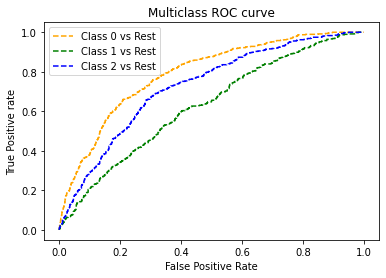

In [ ]:
res=evaluate(rf_optimal_model,X_train_fs,y_train,X_test_fs,y_test,'Hyper_Tuned_Random_Forest')

LOGISTIC REGRESSION

----- Evaluation on train data -----

Confusion matrix 

[[1339  252  307]
 [ 620  409  870]
 [ 311  262 1325]]

 Accuracy =  0.5395961369622476

 Recall =  0.5395961369622476

 Precision =  0.5208411638391068

 F1 score =  0.5115118957962497

 Roc_Auc score =  0.7246416967737853


----- Evaluation on test data -----

Confusion matrix 

[[322  62  91]
 [149 104 221]
 [100  65 310]]

 Accuracy =  0.5168539325842697

 Recall =  0.5168539325842697

 Precision =  0.5042151189297074

 F1 score =  0.49210229078014783

 Roc_Auc score =  0.7084762576032323


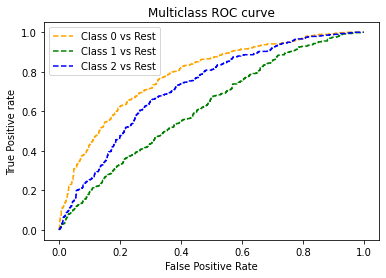

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Fit on the train set
logreg.fit(X_train_fs,y_train)

# Evaluate the results
res=evaluate(logreg,X_train_fs,y_train,X_test_fs,y_test,'Logistic_Regression')
final_list.append(res)

SUMMARY OF MODEL PREDICTION
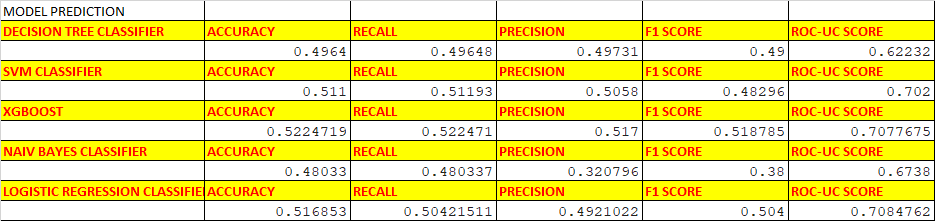